In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

C:\Users\18gia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('names.txt', 'r') as f:
    words = f.read().split('\n')

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)} 
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [4]:
block_size = 3
def build_dataset(words):
    global block_size
    X , Y = [],[]

    for word in words:

        context = [0] * block_size
        #print(word)
        for ch in word + '.':
            X.append(context)
            ix = stoi[ch]
            Y.append(ix)
            # print(''.join(itos[i] for i in context),'--->',itos[ix])
            #update context
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)

    return X, Y

import random 
random.seed(42)
random.shuffle(words)
n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])
    

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [5]:
C = torch.rand(27,2)
emb = C[Xtr]
#let's build the second layer
W1 = torch.rand(6,100) #6 because we have 3 bloc sized each embedded with 2 parameters, while 100 is random
b1  =torch.rand(100)
#we cannot multipli emb @ W1 given the dimensionalities, so we need to transform emb in a n X 6
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #if you write -1 torch automatically infers that the first dimension must be 32 or whatever n it is 
#output layer
W2 = torch.randn(100,27)
b2 = torch.rand(27)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad = True

In [6]:
#we want to understand what's the best learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre #lrs goes from 0.001 to 1

In [7]:
lri = []
lossi = []

for i in range(10000):

    #mini batch: we calculate the gradient descent on a subset of examples. This will make
    #the gradient much less precise, but still good enough
    idx = torch.randint(0,  Xtr.shape[0],(32,))
    #forward pass
    emb = C[Xtr[idx]]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[idx])
    
    #grad do 0
    for p in parameters:
        p.grad = None

    #backward pass
    loss.backward()

    #grad update
    #lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())

print(loss.item())


3.4199514389038086


In [8]:
emb = C[Xdev] # (32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.4080, grad_fn=<NllLossBackward0>)

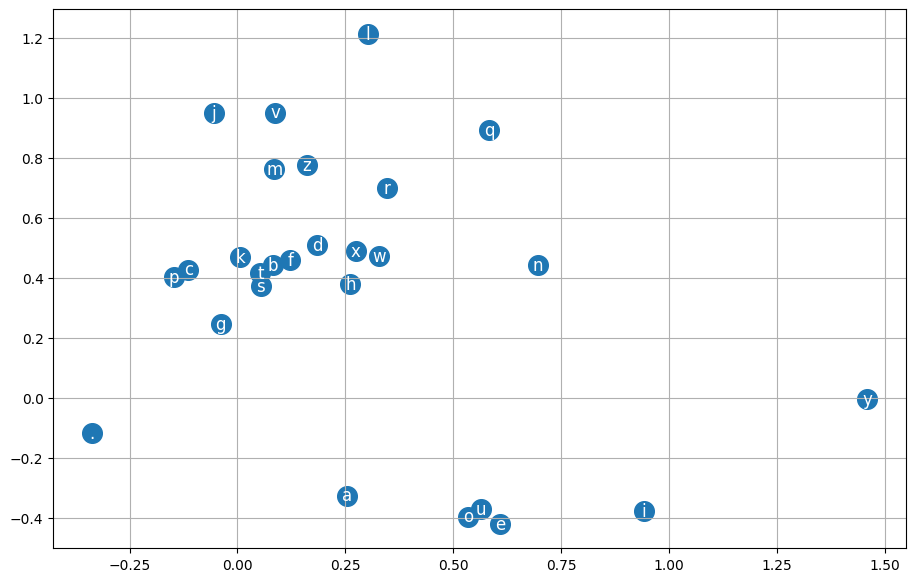

In [9]:
plt.figure(figsize=(11,7))
plt.scatter(C[:,0].data,C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(), itos[i],ha = 'center', va = 'center', color = 'white', fontsize=12)

plt.grid('minor')

In [10]:
#sampling from the model
for _ in range(20):
   out =[]
   context = [0]*block_size

   while True:
      emb = C[torch.tensor([context])] #1,2,3 
      h = torch.tanh(emb.view(1,-1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim = 1)
      ix = torch.multinomial(probs, num_samples = 1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
         break

   print(''.join(itos[i] for i in out))



      
   

liunne.
hila.
miylteiy.
khia.
avennah.
emuio.
cera.
birah.
pavleaylyoh.
elda.
bhroe.
elyah.
cabel.
krayde.
aeri.
mareanyno.
sawza.
delir.
cen.
gbrisg.
